<a href="https://colab.research.google.com/github/rajeevfromkrec/deep_learning/blob/master/NLP_LSTM%2C_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



In [7]:
import gensim.downloader as api
glove_model= api.load('glove-wiki-gigaword-300')

[=================================================-] 99.5% 374.1/376.1MB downloaded


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
glove_model.most_similar("rajeev")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('masand', 0.5521674752235413),
 ('cnn-ibn', 0.49111610651016235),
 ('dhawan', 0.48061224818229675),
 ('ram', 0.4350363612174988),
 ('erlich', 0.4299739599227905),
 ('lipsky', 0.4271351993083954),
 ('butorac', 0.40753355622291565),
 ('khandelwal', 0.39906442165374756),
 ('verma', 0.3943713903427124),
 ('gopal', 0.3907014727592468)]

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-06-01 12:31:34--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  27.4MB/s    in 0.2s    

2020-06-01 12:31:35 (27.4 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type = 'post'
padding_type = 'post'
oov_tok = 'oov'
training_portion = .8

In [4]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))

153


In [0]:
sentences = []
labels = []
with open("/tmp/bbc-text.csv", 'r') as csvfile:
  csv_reader = csv.DictReader(csvfile)
  for item in csv_reader:
    sentences.append(item['text'])
    labels.append(item['category'])

In [6]:
train_size = 1780

train_sentences = sentences[0:train_size]
train_labels = labels[0:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

1780
1780
1780
445
445


In [7]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok )
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index


train_sequences = tokenizer.texts_to_sequences(train_sentences)

train_padded = pad_sequences(train_sequences,padding=padding_type ,maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

750
120
300
120
311
120


In [8]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences,padding=padding_type,maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

445
(445, 120)


In [9]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)
type(validation_label_seq)

[5]
[2]
[1]
(1780, 1)
[4]
[5]
[3]
(445, 1)


numpy.ndarray

In [12]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length),
                                    tf.keras.layers.BatchNormalization(),
                                    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(64)),
                                    tf.keras.layers.Dense(24,activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Dense(6,activation='softmax')

])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
batch_normalization_1 (Batch (None, 120, 16)           64        
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               31488     
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 50,798
Trainable params: 50,766
Non-trainable params: 32
_________________________________________________

In [13]:
num_epochs = 20
history = model.fit(train_padded,training_label_seq,epochs=num_epochs,validation_data=(validation_padded,validation_label_seq))

Epoch 1/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7346 - accuracy: 0.2180 - val_loss: 1.6932 - val_accuracy: 0.2270
Epoch 2/20
56/56 [==============================] - 1s 14ms/step - loss: 1.4718 - accuracy: 0.4017 - val_loss: 1.5614 - val_accuracy: 0.4045
Epoch 3/20
56/56 [==============================] - 1s 15ms/step - loss: 0.9409 - accuracy: 0.6404 - val_loss: 2.0666 - val_accuracy: 0.2944
Epoch 4/20
56/56 [==============================] - 1s 14ms/step - loss: 0.5663 - accuracy: 0.8084 - val_loss: 1.5351 - val_accuracy: 0.2742
Epoch 5/20
56/56 [==============================] - 1s 14ms/step - loss: 0.3095 - accuracy: 0.9101 - val_loss: 0.6781 - val_accuracy: 0.7640
Epoch 6/20
56/56 [==============================] - 1s 14ms/step - loss: 0.1821 - accuracy: 0.9506 - val_loss: 3.1407 - val_accuracy: 0.4315
Epoch 7/20
56/56 [==============================] - 1s 14ms/step - loss: 0.1249 - accuracy: 0.9657 - val_loss: 1.8598 - val_accuracy: 0.6180
Epoch 8/20
56

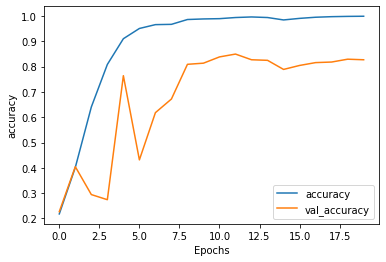

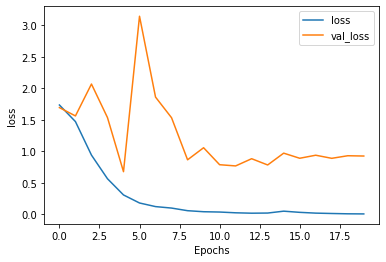

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')